1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

| Biến                        | Mô tả                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| `BALANCE`                   | Số dư còn lại trong tài khoản để thực hiện mua sắm                  |
| `BALANCE_FREQUENCY`         | Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên) |
| `PURCHASES`                 | Tổng số tiền đã mua sắm từ tài khoản                                |
| `ONEOFF_PURCHASES`          | Giá trị lớn nhất của một lần mua hàng đơn lẻ                        |
| `INSTALLMENTS_PURCHASES`    | Tổng giá trị mua hàng theo hình thức trả góp                        |
| `CASH_ADVANCE`              | Số tiền mặt được ứng trước bởi người dùng                           |
| `PURCHASES_FREQUENCY`       | Tần suất thực hiện các giao dịch mua sắm (0 đến 1)                  |
| `ONEOFF_PURCHASES_FREQUENCY`| Tần suất thực hiện các giao dịch mua đơn lẻ (0 đến 1)               |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Tần suất mua hàng trả góp (0 đến 1)                          |
| `CASH_ADVANCE_FREQUENCY`    | Tần suất ứng trước tiền mặt (0 đến 1)                               |
| `CASH_ADVANCE_TRX`          | Số lượng giao dịch ứng trước tiền mặt                               |
| `PURCHASES_TRX`             | Số lượng giao dịch mua hàng                                         |
| `CREDIT_LIMIT`              | Hạn mức tín dụng của thẻ đối với người dùng                         |
| `PAYMENTS`                  | Tổng số tiền người dùng đã thanh toán                               |
| `MINIMUM_PAYMENTS`          | Khoản thanh toán tối thiểu người dùng đã trả                        |
| `PRC_FULL_PAYMENT`          | Tỷ lệ phần trăm thanh toán toàn bộ nợ                              |
| `TENURE`                    | Thời gian sử dụng thẻ tín dụng của người dùng                       |


**Chỉ dùng các features trên để phân cụm**

# Load Dataset

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [4]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Data Analysis

In [6]:
# Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [8]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52,1.44
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.61,2895.06,2330.59,0.29,1.34,1.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00,0.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,170.86,0.00,12.00,0.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,335.63,0.00,12.00,2.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,864.21,0.14,12.00,3.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00,3.00


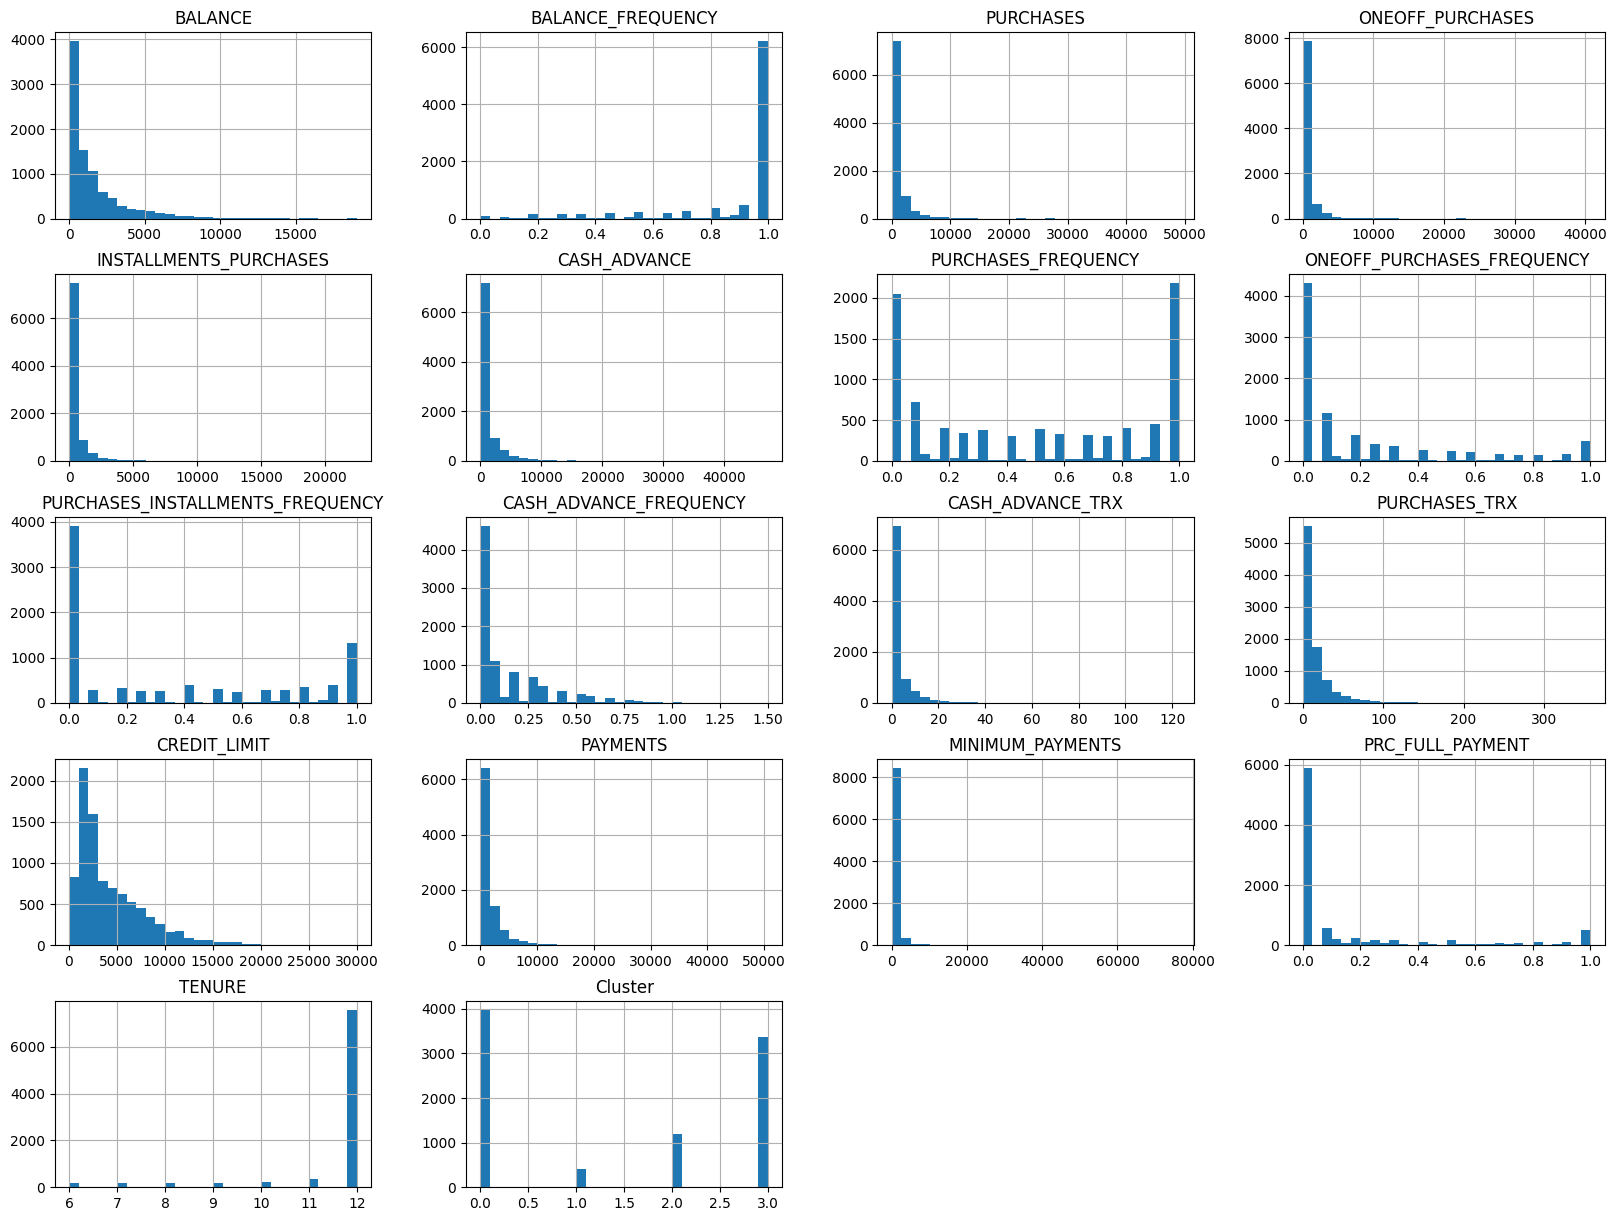

In [10]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

In [11]:
cluster_summary = df.groupby('Cluster')[[
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY'
]].mean().round(2)

cluster_summary

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
Cluster,,,,,,,,
0,1011.75,269.97,209.85,60.39,595.76,0.17,0.09,0.11
1,3551.15,7681.62,5095.88,2587.21,653.64,0.95,0.74,0.07
2,4602.46,501.90,320.37,181.61,4520.72,0.29,0.14,0.48
3,894.91,1236.18,593.97,642.48,210.57,0.89,0.30,0.04


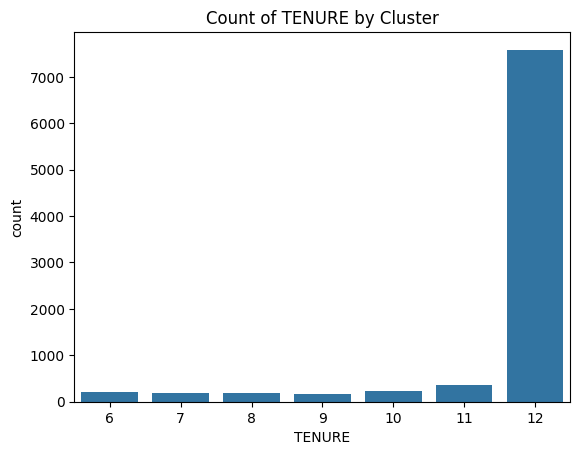

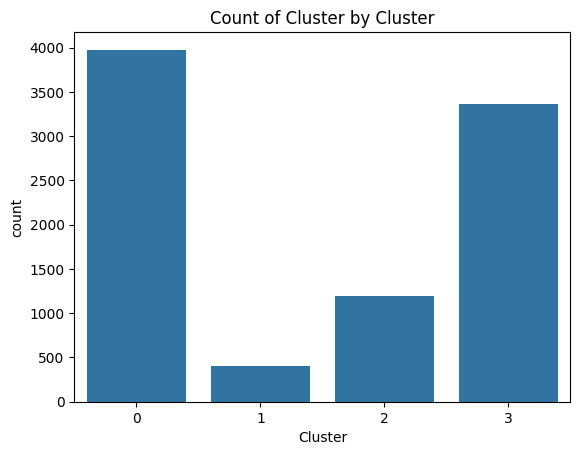

In [12]:
for col in ['TENURE', 'Cluster']:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col} by Cluster')
    plt.show()

# Data Preprocessing

In [13]:
# Replace outlier with median each cluster
def handle_outliers(df, feature):
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        median_value = cluster_data[feature].median()
        std_value = cluster_data[feature].std()
        threshold = 3 * std_value
        outliers = (cluster_data[feature] < (median_value - threshold)) | (cluster_data[feature] > (median_value + threshold))
        df.loc[(df['Cluster'] == cluster) & outliers, feature] = median_value
    return df

In [14]:
cleaned_df = df.copy()
for col in cleaned_df.columns:
    cleaned_df = handle_outliers(cleaned_df, col)
# Kiểm tra lại dữ liệu sau khi loại bỏ outliers
print("Data shape after removing outliers:", cleaned_df.shape)

Data shape after removing outliers: (8950, 18)


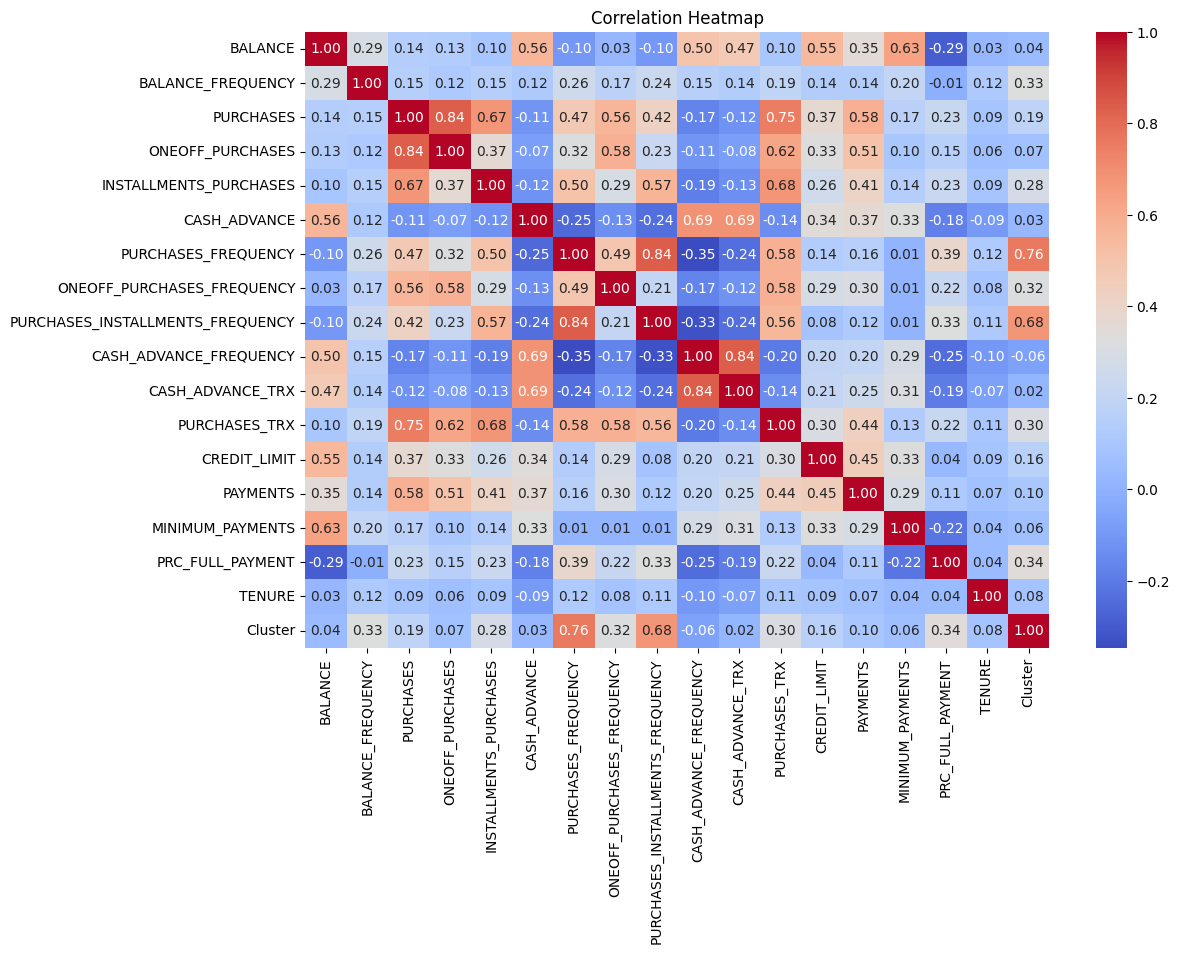

In [15]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [16]:
# Tạo các feature mới
new_df = cleaned_df.copy()

# Tổng chi tiêu
new_df["TOTAL_PURCHASES"] = new_df["ONEOFF_PURCHASES"] + new_df["INSTALLMENTS_PURCHASES"]

# Tỷ lệ chi tiêu một lần / chi tiêu góp
new_df["PURCHASE_TYPE_RATIO"] = new_df["ONEOFF_PURCHASES"] / (new_df["INSTALLMENTS_PURCHASES"] + 1)

# Tỷ lệ chi tiêu / giới hạn tín dụng
new_df["UTILIZATION_RATIO"] = new_df["PURCHASES"] / (new_df["CREDIT_LIMIT"] + 1)

# Tổng giao dịch
new_df["TOTAL_TRANSACTIONS"] = new_df["PURCHASES_TRX"] + new_df["CASH_ADVANCE_TRX"]

# Tỷ lệ thanh toán tối thiểu
new_df["MIN_PAYMENT_RATIO"] = new_df["MINIMUM_PAYMENTS"] / (new_df["PAYMENTS"] + 1)

new_df = pd.get_dummies(new_df, columns=['TENURE'], dtype=int)

In [17]:
new_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TOTAL_PURCHASES,PURCHASE_TYPE_RATIO,UTILIZATION_RATIO,TOTAL_TRANSACTIONS,MIN_PAYMENT_RATIO,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,95.40,0.00,0.095305,2.0,0.687911,0,0,0,0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.00,0.00,0.000000,4.0,0.261289,0,0,0,0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,773.17,773.17,0.103076,12.0,1.006770,0,0,0,0,1
3,1666.670542,0.636364,79.10,0.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.00,0.00,0.010545,2.0,864.206542,0,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,16.00,16.00,0.013322,1.0,0.360340,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,291.12,0.00,0.290829,6.0,0.149685,0,0,0,0,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,300.00,0.00,0.299700,6.0,3.121442,0,0,0,0,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,144.40,0.00,0.144256,5.0,1.001794,0,0,0,0,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.00,0.00,0.000000,2.0,1.041189,0,0,0,0,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cleaned_df = cleaned_df.drop(columns=['Cluster'], errors='ignore')
scaled_data = scaler.fit_transform(cleaned_df)

# Model Part

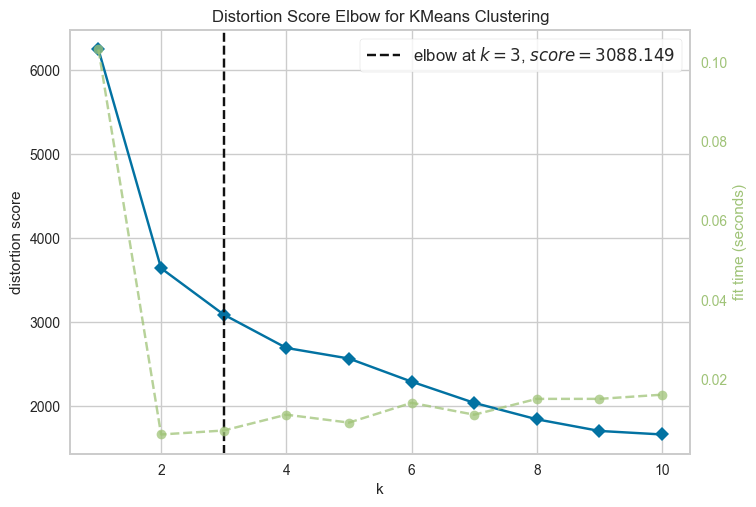

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

In [47]:
# 3.b: Apply other method to compare with KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
# Calculate silhouette score
silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")

Silhouette Score for DBSCAN: 0.33


In [53]:
# 4. Use Pipeline
# 4. a. Use scaler and dimensional reduction
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# 4. b. Create a pipeline
pipeline_3D = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=3)),
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

# 4. c. Fit the pipeline
pipeline_3D.fit(cleaned_df)
# 4. d. Predict the clusters
predicted_clusters_3D = pipeline_3D.predict(cleaned_df)

# 4. f. Visualize the clusters
# Get PCA-transformed features from the pipeline
pca_features_3D = pipeline_3D.named_steps['pca'].transform(pipeline_3D.named_steps['scaler'].transform(cleaned_df))

In [61]:
# 4. b. Use suitable clustering model for this problem.
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Define models to compare
models = {
    'KMeans': KMeans(n_clusters=4),
    'GMM': GaussianMixture(n_components=4),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Compute silhouette scores
scores = {}
for name, model in models.items():
    labels = model.fit_predict(scaled_data)
    # ensure at least 2 clusters for score
    if len(set(labels)) > 1:
        scores[name] = silhouette_score(scaled_data, labels)
    else:
        scores[name] = float('nan')

# Print results and select best
df_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['Silhouette']).sort_values(by='Silhouette', ascending=False)
print(df_scores)
best_model_name = df_scores.index[0]
best_model = models[best_model_name]
print(f"Best model: {best_model_name} (Silhouette = {df_scores.iloc[0][0]:.3f})")

# Fit and assign best clusters to dataframe
df['PredictedCluster'] = best_model.fit_predict(scaled_data)

               Silhouette
KMeans           0.363803
DBSCAN           0.331104
Agglomerative    0.218650
GMM              0.104483
Best model: KMeans (Silhouette = 0.364)


In [55]:
# 4. b. Create a pipeline
pipeline_2D = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

# 4. c. Fit the pipeline
pipeline_2D.fit(cleaned_df)
# 4. d. Predict the clusters
predicted_clusters_2D = pipeline_2D.predict(cleaned_df)

# 4. f. Visualize the clusters
# Get PCA-transformed features from the pipeline
pca_features_2D = pipeline_2D.named_steps['pca'].transform(pipeline_2D.named_steps['scaler'].transform(cleaned_df))

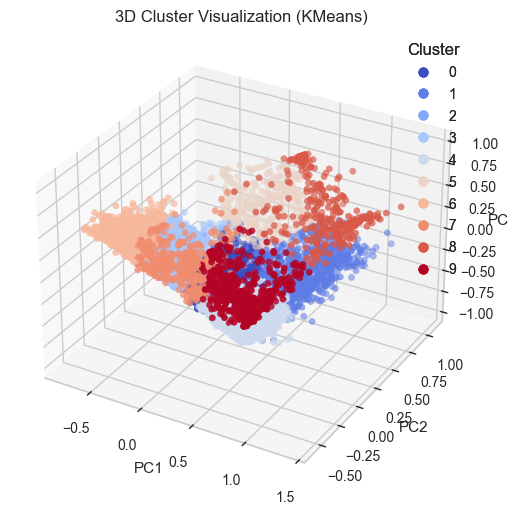

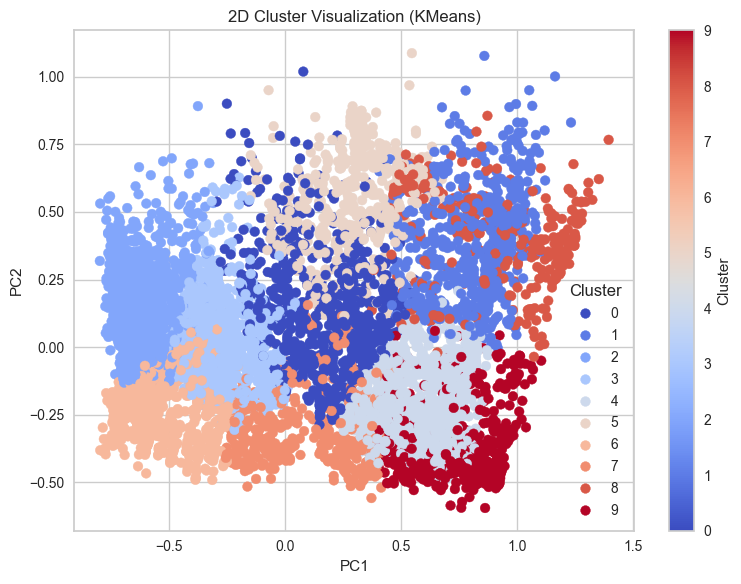

In [56]:
# Visualize your cluster in 2D or 3D to compare the result.
# 3D Cluster Visualization (first three PCs)
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
scatter = ax.scatter(
    pca_features_3D[:, 0],
    pca_features_3D[:, 1],
    pca_features_3D[:, 2],
    c=predicted_clusters_3D,
    cmap='coolwarm'
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Cluster Visualization (KMeans)')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(
    pca_features_2D[:, 0],
    pca_features_2D[:, 1],
    c=predicted_clusters_3D,
    cmap='coolwarm'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Cluster Visualization (KMeans)')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [57]:
# Measure performance of your clustering model.
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Calculate silhouette score
silhouette = silhouette_score(scaled_data, predicted_clusters_3D)
print(f"Silhouette Score: {silhouette:.2f}")
# Calculate Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(scaled_data, predicted_clusters_3D)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")
# Calculate Davies-Bouldin score
davies_bouldin = davies_bouldin_score(scaled_data, predicted_clusters_3D)
print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")

Silhouette Score: 0.23
Calinski-Harabasz Score: 2407.80
Davies-Bouldin Score: 1.39


# Discussion & Conclusion